In [1]:
import numpy as np


class DiophantineEq:
    def __init__(self, params, target):
        self.params = np.array(params)
        self.target = target
        
    def solve_with(self, x):
        x = np.array(x)
        return self.params @ x.T

    def __str__(self):
        return f"{self.params} * x^T = {self.target}"


In [2]:
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, eq, population_size, mutation_chance, crossover_chance, max_generations):
        self.eq = eq
        self.population_size = population_size
        self.mutation_chance = mutation_chance
        self.crossover_chance = crossover_chance
        self.max_generations = max_generations
        self.best_solutions = []
        self.population = None
        self.population_indexes = np.arange(population_size)
        
    def run(self):
        self.best_solutions = []
        self.population = self._generate_population()
        for i in tqdm(range(self.max_generations)):
            fitness = self._fitness(self.population)
            if np.any(fitness == 0):
                self.best_solutions.append(self._get_best_solution())
                break

            new_population = []
            weights = self._get_weights(fitness)
            for _ in range(self.population_size):
                parent1 = self.population[np.random.choice(self.population_indexes, p=weights)]
                parent2 = self.population[np.random.choice(self.population_indexes, p=weights)]
                child = self._crossover(parent1, parent2)
                child = self._mutate(child)
                new_population.append(child)
            self.population = np.array(new_population)
            
            self.best_solutions.append(self._get_best_solution())
        
        self.best_solutions = np.array(self.best_solutions, dtype=object)
        return self.best_solutions[np.argmin(self.best_solutions[:, 1])]
            
    def _generate_population(self):
        return np.random.randint(0, self.eq.target + 1, (self.population_size, len(self.eq.params)))
    
    def _crossover(self, parent1, parent2):
        if random.random() > self.crossover_chance:
            return parent1
        index = random.randint(0, len(parent1) - 1)
        return np.concatenate((parent1[:index], parent2[index:]))
    
    def _mutate(self, child):
        if random.random() > self.mutation_chance:
            return child
        index = random.randint(0, len(child) - 1)
        child[index] += random.randint(-10, 10)
        return child
    
    def _fitness(self, x):
        return np.abs(self.eq.solve_with(x) - self.eq.target)
    
    def _get_weights(self, fitness):
        weights = 1 / fitness
        weights_sum = np.sum(weights)
        weights = weights / weights_sum
        return weights
    
    def _get_best_solution(self):
        fitness = self._fitness(self.population)
        best_index = np.argmin(fitness)
        return [self.population[best_index], fitness[best_index]]
    
    def plot_best_solutions(self, marker='o'):
        plt.figure(figsize=(20, 10))
        plt.plot(self.best_solutions[:, 1], marker=marker)
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        ax = plt.gca()
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        plt.show()

# Example

In [130]:
par = np.random.randint(low=0, high=10, size=50)
eq = DiophantineEq(par, par @ np.random.randint(low=-10, high=10, size=50).T)
print(eq)

[3 2 8 4 7 6 7 2 4 7 1 2 0 0 9 3 7 8 0 6 5 9 5 8 9 2 8 5 7 1 2 8 8 2 9 2 7
 1 3 5 5 3 7 4 8 8 3 6 8 6] * x^T = 258


In [135]:
ga = GeneticAlgorithm(eq, 500, 0.1, 1, 500)
solution, fitness = ga.run()
print(f"Solution: {solution}, fitness: {fitness}")

 86%|████████▌ | 429/500 [00:09<00:01, 44.75it/s]

Solution: [  6  56  -8  18  -1   2  -2  19  -8 -14  34  48  28 240  -8  12 -24   7
 179   3   0 -19  13  10 -17  21  -3  29   2   2  -2  -5 -25 120 -25  12
  14  75   8  -3  -2   3  32  13 -13  10   7   1   1  -7], fitness: 0


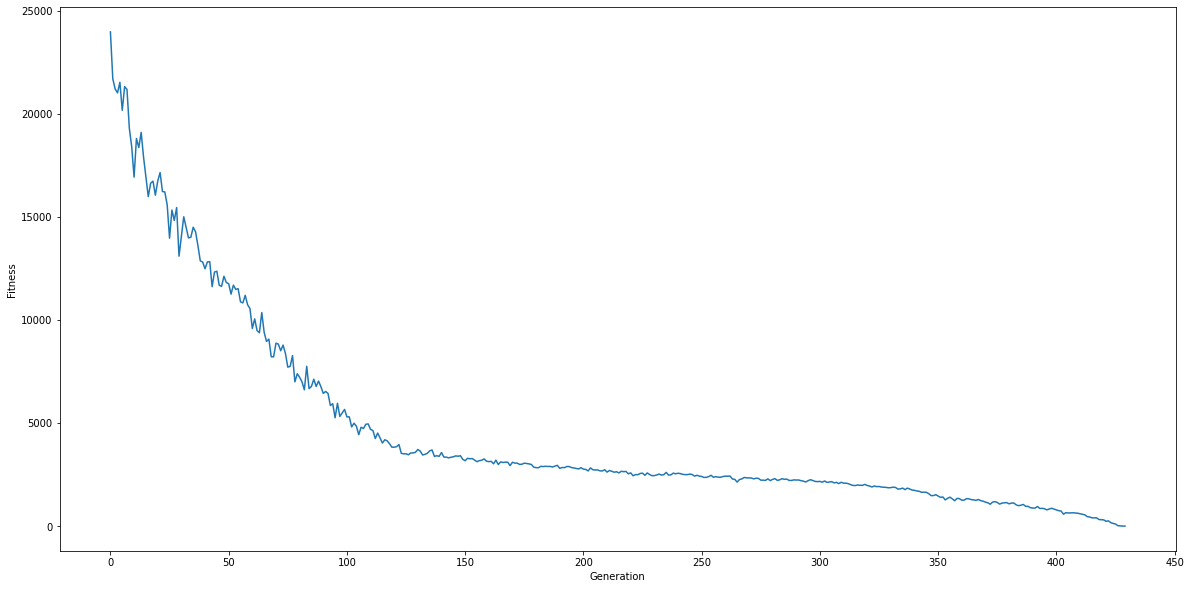

In [136]:
ga.plot_best_solutions(marker=None)

In [5]:
par = np.random.randint(low=0, high=10, size=50)
eq = DiophantineEq(par, par @ np.random.randint(low=-10, high=10, size=50).T)
print(eq)

[2 9 9 9 3 4 6 9 8 8 7 5 3 7 3 9 9 1 5 4 9 6 2 4 4 8 6 1 6 4 6 9 4 9 8 8 7
 7 8 4 6 6 5 0 1 8 7 3 0 5] * x^T = 263


 44%|████▎     | 218/500 [00:10<00:14, 19.84it/s]


Solution: [  8 -23 -34  -1  62  13 -17 -28  -5   9  -9  12   8  14  23  -1 -12  16
 -13  12  14 -29  25  -6  12   8   6  16  -2  25 -21  23  91  -6 -17  -6
   4  24 -10  14  27  -5  -5 103   3   2   2  28 110 -10], fitness: 0


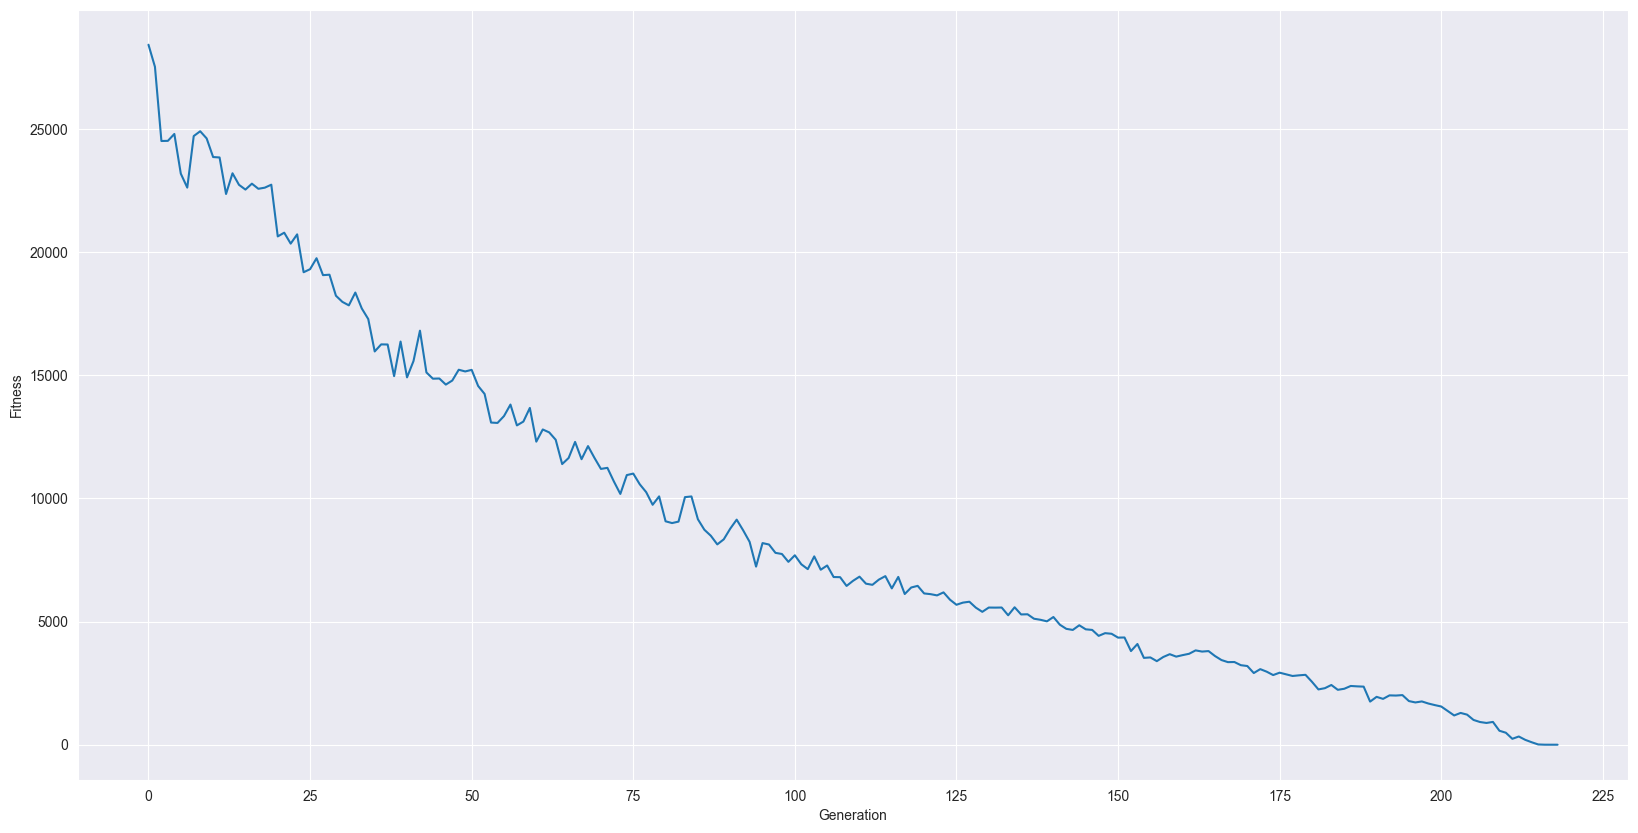

In [11]:
ga = GeneticAlgorithm(eq, 500, 1, 1, 500)
solution, fitness = ga.run()
print(f"Solution: {solution}, fitness: {fitness}")
ga.plot_best_solutions(marker=None)